# Лабораторная работа №4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np
from collections import Counter
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, cohen_kappa_score, confusion_matrix
from sklearn.svm import SVC
from imblearn.under_sampling import NearMiss
from pprint import pprint
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

```
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
```

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

In [3]:
data=pd.DataFrame(data)

In [4]:
data=data[data[0]=='дождь']

In [5]:
data[1].value_counts(normalize=True)

1
False    0.666667
True     0.333333
Name: proportion, dtype: float64

Вероятность выйти на прогулку во время дождя 0.333333 или 33,3%

# Задание №2

In [6]:
data=pd.read_csv("C:\MLforGIt\ML_Labs\data\csgo_task.csv")

In [7]:
data.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
count,122410.000000,122410.000000,121386.000000,122410.000000,121627.000000,122410.000000,122410.000000,122410.000000,122410.000000,121766.000000,121560.000000,121766.000000,122410.000000,122182.000000
mean,97.886922,6.709239,6.785412,412.106568,402.724773,314.142121,298.444670,9789.023773,11241.036680,2.054794,2.772869,1.613447,4.273752,4.266038
std,54.465238,4.790362,4.824752,132.293290,139.911535,171.029736,174.576545,11215.042286,12162.806759,1.841505,2.011093,1.605278,1.205500,1.228508
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,0.000000,0.000000,4.000000,4.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,3.000000,1.000000,5.000000,5.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,5.000000,3.000000,5.000000,5.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,5.000000,5.000000,5.000000,6.000000


## Предобработка

In [13]:
data.shape

(122410, 16)

In [14]:
data.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
5,114.97,1.0,0.0,de_dust2,False,500.0,500.0,500.0,0.0,1750.0,10550.0,5.0,0.0,1.0,5.0,5.0
6,94.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
7,74.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
8,54.97,1.0,0.0,de_dust2,False,249.0,89.0,269.0,0.0,2300.0,2950.0,3.0,0.0,0.0,3.0,1.0
9,174.97,2.0,0.0,de_dust2,False,500.0,500.0,196.0,0.0,19800.0,23450.0,2.0,0.0,0.0,5.0,5.0


## Значение столбцов:
1. time_left - длительность раунда
2. ct_score - количество очков у команды контр-террористов
3. t_score - количество очков у террористов
4. map - карта
5. bomb_planted - установлена ли бомба
6. ct_health и t_health - суммарное здоровье контр-террористов и террористов соответственно
7. ct_armor и t_armor - суммарная броня контр-террористов и террористов соответственно
8. ct_money и t_money - суммарное количество денег контр-террористов и террористов соответственно
9. ct_helmets и t_helmets - суммарное количество шлемов контр-террористов и террористов соответственно
10. ct_defuse_kits - количество наборов обезвреживания бомбы у контр-террористо
11. ct_players_alive и t_players_alive - количество живых контр-террористов и террористов соответственно 

Карты в CS сбалансированны, соответсвенное не должны влиять на то исход сражения и закладку бомбы. Отталкиваясь от этого, понятно, что этот столбец можно дропнуть. Проверим это утверждение далее.

In [15]:
data.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
5,114.97,1.0,0.0,de_dust2,False,500.0,500.0,500.0,0.0,1750.0,10550.0,5.0,0.0,1.0,5.0,5.0
6,94.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
7,74.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
8,54.97,1.0,0.0,de_dust2,False,249.0,89.0,269.0,0.0,2300.0,2950.0,3.0,0.0,0.0,3.0,1.0
9,174.97,2.0,0.0,de_dust2,False,500.0,500.0,196.0,0.0,19800.0,23450.0,2.0,0.0,0.0,5.0,5.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  float64
 2   t_score           121386 non-null  float64
 3   map               122199 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  float64
 6   t_health          121627 non-null  float64
 7   ct_armor          122410 non-null  float64
 8   t_armor           122410 non-null  float64
 9   ct_money          122410 non-null  float64
 10  t_money           122410 non-null  float64
 11  ct_helmets        121766 non-null  float64
 12  t_helmets         121560 non-null  float64
 13  ct_defuse_kits    121766 non-null  float64
 14  ct_players_alive  122410 non-null  float64
 15  t_players_alive   122182 non-null  float64
dtypes: bool(1), float64(

In [17]:
#data['map'] = data['map'].dropna()

In [18]:
data['map'] = data['map'].fillna(data['map'].mode()[0])

In [19]:
for column in data['map'].unique():
    print(column)
    print(data[data['map'] == column]['bomb_planted'].value_counts(normalize = True))
    print()

de_dust2
bomb_planted
False    0.879327
True     0.120673
Name: proportion, dtype: float64

de_mirage
bomb_planted
False    0.887259
True     0.112741
Name: proportion, dtype: float64

de_inferno
bomb_planted
False    0.870929
True     0.129071
Name: proportion, dtype: float64

de_nuke
bomb_planted
False    0.902564
True     0.097436
Name: proportion, dtype: float64

de_overpass
bomb_planted
False    0.904738
True     0.095262
Name: proportion, dtype: float64

de_vertigo
bomb_planted
False    0.890238
True     0.109762
Name: proportion, dtype: float64

de_train
bomb_planted
False    0.895331
True     0.104669
Name: proportion, dtype: float64

de_cache
bomb_planted
False    0.923611
True     0.076389
Name: proportion, dtype: float64



Видно, что соотношение закладки бомбы на всех картах примерно равно. Соответственно гипотеза подтвердилась.

In [20]:
data.drop(['map'], axis=1, inplace=True)

# Заполнение пропусков и удаление дубликатов

In [21]:
data.isna().sum()

time_left              0
ct_score               0
t_score             1024
bomb_planted           0
ct_health              0
t_health             783
ct_armor               0
t_armor                0
ct_money               0
t_money                0
ct_helmets           644
t_helmets            850
ct_defuse_kits       644
ct_players_alive       0
t_players_alive      228
dtype: int64

Так как кол-во строк достаточно внушительно, при удалении строк с пропущенными значениями, потеря данных будет незначительна.

In [22]:
data.dropna(inplace=True)

In [23]:
data.isna().sum()

time_left           0
ct_score            0
t_score             0
bomb_planted        0
ct_health           0
t_health            0
ct_armor            0
t_armor             0
ct_money            0
t_money             0
ct_helmets          0
t_helmets           0
ct_defuse_kits      0
ct_players_alive    0
t_players_alive     0
dtype: int64

In [24]:
data.duplicated().sum()

6308

In [25]:
data = data.drop_duplicates().reset_index(drop=True)

Удаление дубликатов

In [26]:
data.duplicated().sum()

0

Заменим числа с плавающей точкой на целочисленный тип данных во всех столбцах, кроме time_left

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111988 entries, 0 to 111987
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         111988 non-null  float64
 1   ct_score          111988 non-null  float64
 2   t_score           111988 non-null  float64
 3   bomb_planted      111988 non-null  bool   
 4   ct_health         111988 non-null  float64
 5   t_health          111988 non-null  float64
 6   ct_armor          111988 non-null  float64
 7   t_armor           111988 non-null  float64
 8   ct_money          111988 non-null  float64
 9   t_money           111988 non-null  float64
 10  ct_helmets        111988 non-null  float64
 11  t_helmets         111988 non-null  float64
 12  ct_defuse_kits    111988 non-null  float64
 13  ct_players_alive  111988 non-null  float64
 14  t_players_alive   111988 non-null  float64
dtypes: bool(1), float64(14)
memory usage: 12.1 MB


In [28]:
columns_to_int=['ct_score',
                't_score',
                'ct_health',
                't_health',
                'ct_armor',
                't_armor',
                'ct_money',
                't_money',
                'ct_helmets',
                't_helmets',
                'ct_defuse_kits',
                'ct_players_alive',
                't_players_alive',
                'bomb_planted']

In [29]:
for column in columns_to_int:
    data[column] = data[column].astype(int)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111988 entries, 0 to 111987
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         111988 non-null  float64
 1   ct_score          111988 non-null  int32  
 2   t_score           111988 non-null  int32  
 3   bomb_planted      111988 non-null  int32  
 4   ct_health         111988 non-null  int32  
 5   t_health          111988 non-null  int32  
 6   ct_armor          111988 non-null  int32  
 7   t_armor           111988 non-null  int32  
 8   ct_money          111988 non-null  int32  
 9   t_money           111988 non-null  int32  
 10  ct_helmets        111988 non-null  int32  
 11  t_helmets         111988 non-null  int32  
 12  ct_defuse_kits    111988 non-null  int32  
 13  ct_players_alive  111988 non-null  int32  
 14  t_players_alive   111988 non-null  int32  
dtypes: float64(1), int32(14)
memory usage: 6.8 MB


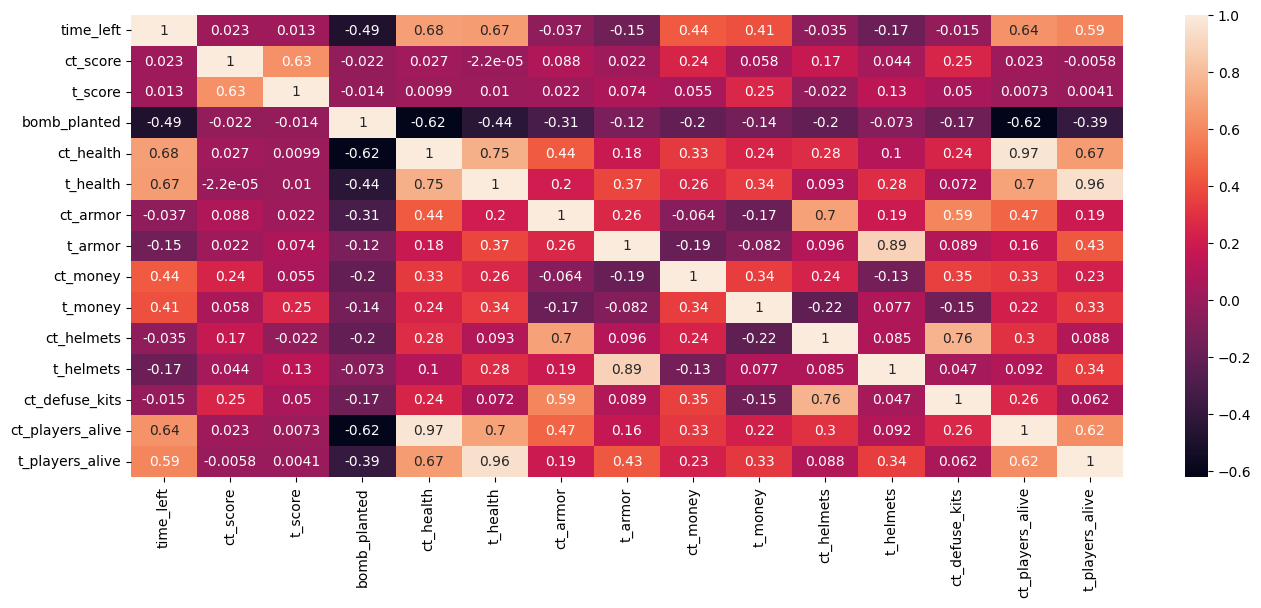

In [31]:
df_num = data.select_dtypes(include=np.number)
df_corr = df_num.corr()
plt.figure(figsize = (16,6))
sns.heatmap(df_corr, annot=True);

Присутствует мультиколлинеарность, далее протестируем следует ли удалить эти столбцы.

In [32]:
#data.drop(['ct_players_alive', 't_players_alive', 'ct_health', 't_health'], axis=1, inplace=True)

In [33]:
df_corr = df_num.corr()

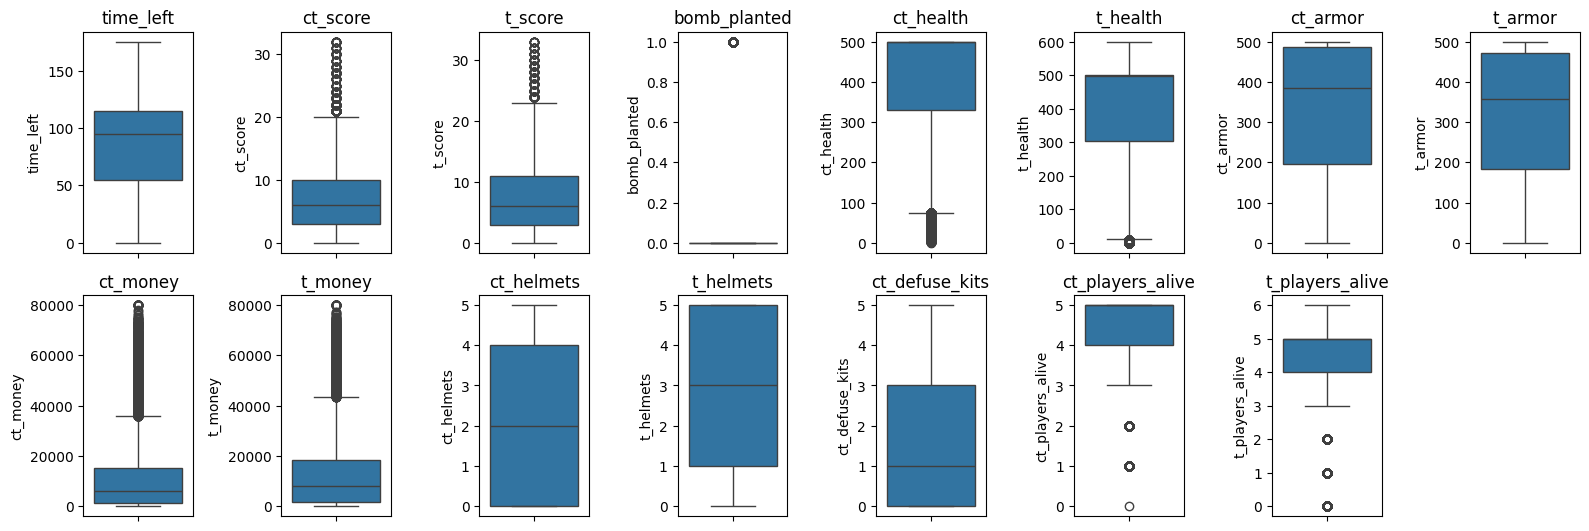

In [34]:
plt.figure(figsize=(16, 8))
for i, column in enumerate(df_num.columns):
    plt.subplot(3, 8, i + 1)
    sns.boxplot(data=df_num, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

Аномальных значений не наблюдается.

Данные чистые.

## Разделение на выборки

In [36]:
X = data.drop('bomb_planted', axis=1)
y = data['bomb_planted']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
y_train

96603     0
104679    0
21611     0
14168     0
81753     0
         ..
76820     0
110268    0
103694    0
860       0
15795     0
Name: bomb_planted, Length: 89590, dtype: int32

In [40]:
y_test

26686    1
91661    0
34862    0
63682    0
64142    0
        ..
35096    0
1638     0
12385    0
97541    1
26050    0
Name: bomb_planted, Length: 22398, dtype: int32

### Проверка на дисбаланс

In [41]:
print(f'1: {sum(y_train == 1)}')
print(f'0: {sum(y_train == 0)}')

1: 10599
0: 78991


In [42]:
nm = NearMiss()
X_train, y_train = nm.fit_resample(X_train, y_train.ravel())

In [43]:
print(f'1: {sum(y_train == 1)}')
print(f'0: {sum(y_train == 0)}')

1: 10599
0: 10599


Дисбаланс классов устранен

## Реализация метрик и KNN

In [44]:
def my_accuracy(y_test, y_pred):
    con_matrix = confusion_matrix(y_test, y_pred)
    TN = con_matrix[1][1]
    FP = con_matrix[0][1]
    FN = con_matrix[1][0] 
    TP = con_matrix[0][0]
    return (TP + TN) / (TN + FP + TP + FN)

In [45]:
def my_precision(y_test, y_pred):
    con_matrix = confusion_matrix(y_test, y_pred)
    FP = con_matrix[0][1] 
    TP = con_matrix[1][1]
    return (TP / (TP + FP))

In [46]:
def my_recall(y_test, y_pred):
    con_matrix = confusion_matrix(y_test, y_pred)
    FN = con_matrix[1][0] 
    TP = con_matrix[1][1]
    return (TP / (TP + FN))

In [47]:
def my_f(y_test, y_pred):
    precision = my_precision(y_test, y_pred)
    recall = my_recall(y_test, y_pred)
    return (2 * precision * recall) / (precision + recall)

## Функция обучения модели с метриками

In [43]:
class my_KNN:
    def __init__(self, k=3):
        self.k = k
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def pre(self, x_test):
        distances = [np.sqrt(np.sum((x_test - x_train)**2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return (most_common[0][0])
    def predict(self, X_test):
        y_pred = [self.pre(x_test) for x_test in X_test]
        return np.array(y_pred)

In [48]:
def fit_model_and_param(model, X_train, X_test, y_train, y_test, param=None):
    best_model = None
    best_params = None
    results = {}
    con_matrix = None
    if param is not None:
       param = GridSearchCV(model, param, cv=5, verbose=2)
       param.fit(X_train, y_train)
       best_model = param.best_estimator_
       best_params = param.best_params_
       y_pred = param.predict(X_test)
    else:
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      best_model = model

    metrics = {
        "roc_auc": roc_auc_score(y_test, y_pred),
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "cohen_kappa": cohen_kappa_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
    }
    my_metrics = {
        "my_accuracy": my_accuracy(y_test, y_pred),
        "my_precision": my_precision(y_test, y_pred),
        "my_recall": my_recall(y_test, y_pred),
        "my_f1": my_f(y_test, y_pred),
    }
    results['y_pred'] = y_pred
    results['best_model'] = best_model
    results['best_params'] = best_params
    results['metrics'] = metrics
    results['my_metrics'] = my_metrics

    return results

In [49]:
class output_matrix_or_roc:
    def __init__(self, y_test, y_pred):
        self.y_test = y_test
        self.y_pred = y_pred
    def confusion_matrix(self):
        sns.heatmap(confusion_matrix(self.y_test, self.y_pred), annot=True, fmt='d', cmap='Blues', cbar=False);
        plt.xlabel('Предсказанные классы')
        plt.ylabel('Фактические классы')
        plt.title('Матрица ошибок')
        plt.show()
    def roc_curve(self):
        fpr, tpr, thresholds = roc_curve(self.y_test, self.y_pred)
        fig = plt.figure(figsize=(6, 6))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr)
        plt.xlabel('FP Rate')
        plt.ylabel('TP Rate')
        plt.title('ROC Curve')
        plt.show()

## my_KNN на маленькой выборке

In [46]:
data_small = data.head(100)

In [47]:
data_small.shape

(100, 15)

In [48]:
X_small = data_small.drop('bomb_planted', axis=1)
y_small = data_small['bomb_planted']

In [49]:
y_small

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: bomb_planted, Length: 100, dtype: int32

In [50]:
X_small

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0,0,500,500,0,0,4000,4000,0,0,0,5,5
1,156.03,0,0,500,500,400,300,600,650,0,0,1,5,5
2,96.03,0,0,391,400,294,200,750,500,0,0,1,4,4
3,76.03,0,0,391,400,294,200,750,500,0,0,1,4,4
4,174.97,1,0,500,500,192,0,18350,10750,0,0,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,174.96,4,15,500,500,91,195,18000,36100,0,2,1,5,5
96,114.96,4,15,500,500,491,495,900,20100,2,5,2,5,5
97,94.96,4,15,483,400,491,395,1500,15400,2,4,2,5,4
98,74.96,4,15,283,204,291,272,250,11800,1,3,1,3,3


In [51]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

In [52]:
X_train_small.shape

(80, 14)

In [53]:
X_test_small.shape

(20, 14)

In [54]:
y_train_small.shape

(80,)

In [55]:
y_test_small.shape

(20,)

In [56]:
scaler = StandardScaler()
scaler.fit(X_train_small)
X_train_small = scaler.transform(X_train_small)
X_test_small = scaler.transform(X_test_small)

In [57]:
my_knn = my_KNN(4)

In [58]:
my_knn.fit(X_train_small, y_train_small.values)

In [59]:
y_pred_small = my_knn.predict(X_test_small)

In [60]:
metrics = {
        "roc_auc": roc_auc_score(y_test_small, y_pred_small),
        "accuracy": accuracy_score(y_test_small, y_pred_small),
        "recall": recall_score(y_test_small, y_pred_small),
        "cohen_kappa": cohen_kappa_score(y_test_small, y_pred_small),
        "f1": f1_score(y_test_small, y_pred_small),
    }

In [61]:
pprint(metrics)

{'accuracy': 0.95, 'cohen_kappa': 0.0, 'f1': 0.0, 'recall': 0.0, 'roc_auc': 0.5}


In [62]:
output = output_matrix_or_roc(y_test_small, y_pred_small)

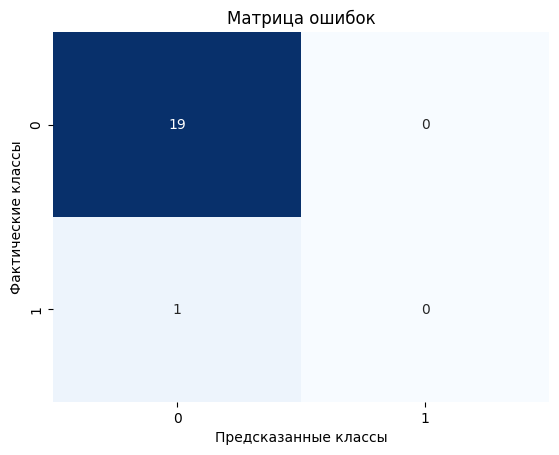

In [63]:
output.confusion_matrix()

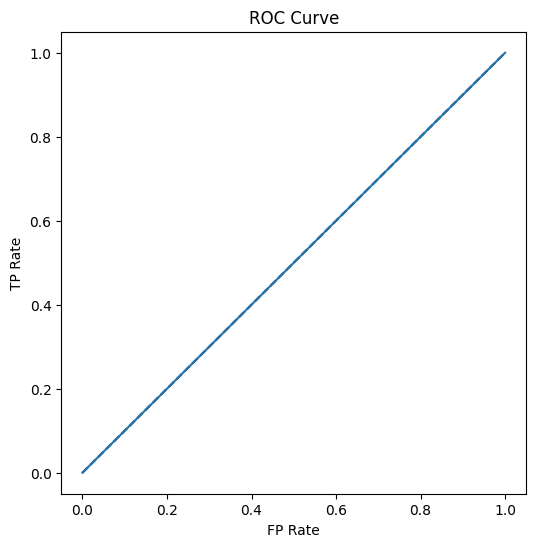

In [64]:
output.roc_curve()

Сравним с эталонным методом

In [65]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_small, y_train_small)
y_pred = knn.predict(X_test_small)
score = accuracy_score(y_test_small, y_pred_small)

In [66]:
metrics = {
        "roc_auc": roc_auc_score(y_test_small, y_pred_small),
        "accuracy": accuracy_score(y_test_small, y_pred_small),
        "recall": recall_score(y_test_small, y_pred_small),
        "cohen_kappa": cohen_kappa_score(y_test_small, y_pred_small),
        "f1": f1_score(y_test_small, y_pred_small),
    }

In [67]:
pprint(metrics)

{'accuracy': 0.95, 'cohen_kappa': 0.0, 'f1': 0.0, 'recall': 0.0, 'roc_auc': 0.5}


In [68]:
output = output_matrix_or_roc(y_test_small, y_pred)

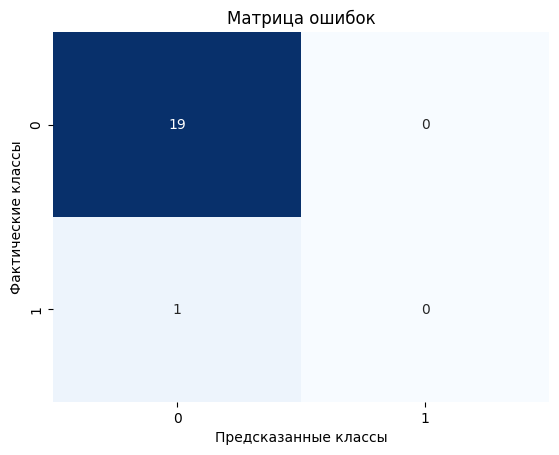

In [69]:
output.confusion_matrix()

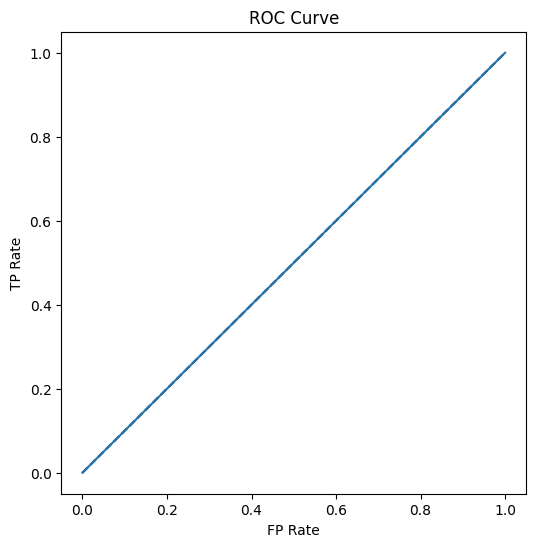

In [70]:
output.roc_curve()

Метрики сходятся - реализация правильная

## Логистическая регрессия

In [52]:
params_grid = {
    "penalty": ['l1'],
    "max_iter": [100],
    'C': [0.1],
    'solver': ['liblinear']
}

In [53]:
lg = LogisticRegression()

In [54]:
result = fit_model_and_param(lg, X_train, X_test, y_train, y_test, params_grid)
pprint(result)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
{'best_model': LogisticRegression(C=0.1, penalty='l1', solver='liblinear'),
 'best_params': {'C': 0.1,
                 'max_iter': 100,
                 'penalty': 'l1',
                 'solver': 'liblinear'},
 'metrics': {'accuracy': 0.9313331547459595,
             'cohen_kappa': 0.6892925425553947,
             'f1': 0.7283645354998233,
             'recall': 0.7843286420692278,
             'roc_auc': 0.8676056685989825},
 'my_metrics': {'my_accuracy': 0.9313331547459595,
                'my_f1': 0.7283645354998233,
        

In [55]:
import pickle

with open("C:/MLforGIt/ML_RGR/Models/LG.pickle","wb") as f:
    pickle.dump(result["best_model"],f)

In [74]:
output = output_matrix_or_roc(y_test, result['y_pred'])

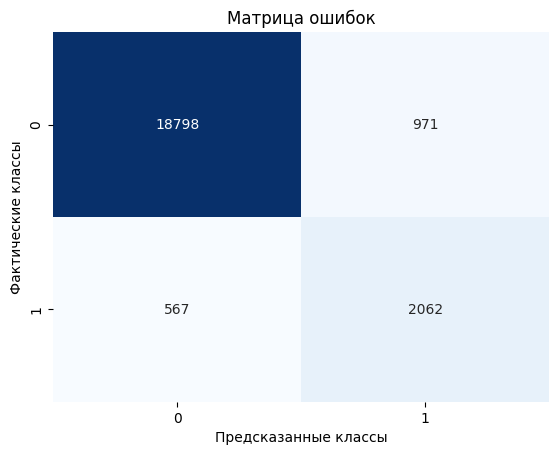

In [75]:
output.confusion_matrix()

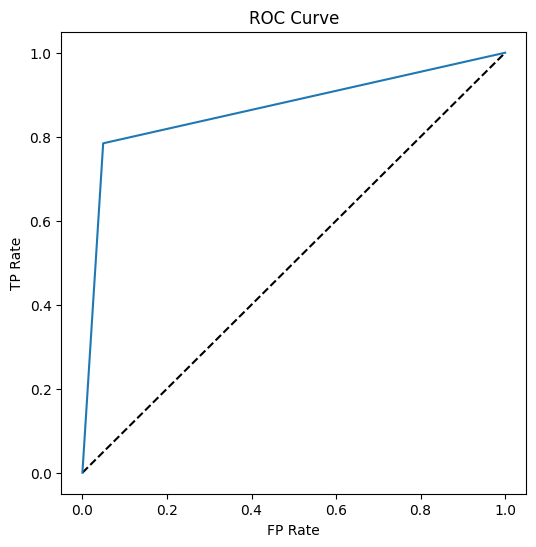

In [76]:
output.roc_curve()

## KNN

In [77]:
#k_range = range(1,20)
#scores = {}
#best_scores, index = 0, 0 
#for k in k_range:
    #knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(X_train, y_train)
    #y_pred = knn.predict(X_test)
    #scores[k] = accuracy_score(y_test, y_pred)
    #if scores[k] > best_scores:
        #best_scores = scores[k]
        #index = k
    

In [78]:
#scores

In [50]:
k=6
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = accuracy_score(y_test, y_pred)

In [51]:
import pickle

with open("C:/MLforGIt/ML_RGR/Models/KNN.pickle","wb") as f:
    pickle.dump(knn,f)

In [80]:
metrics = {
        "roc_auc": roc_auc_score(y_test_small, y_pred_small),
        "accuracy": accuracy_score(y_test_small, y_pred_small),
        "recall": recall_score(y_test_small, y_pred_small),
        "cohen_kappa": cohen_kappa_score(y_test_small, y_pred_small),
        "f1": f1_score(y_test_small, y_pred_small),
    }
pprint(metrics)

{'accuracy': 0.95, 'cohen_kappa': 0.0, 'f1': 0.0, 'recall': 0.0, 'roc_auc': 0.5}


In [81]:
output = output_matrix_or_roc(y_test, y_pred)

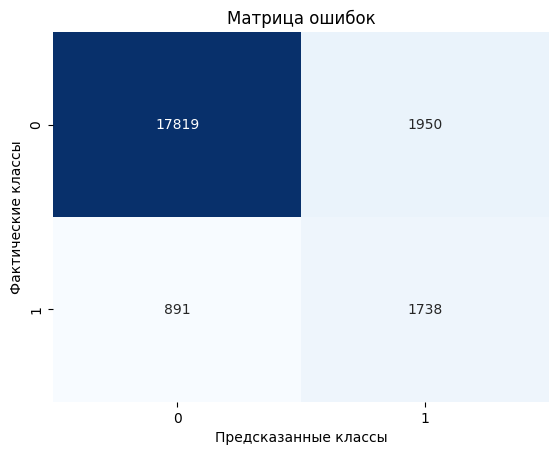

In [82]:
output.confusion_matrix()

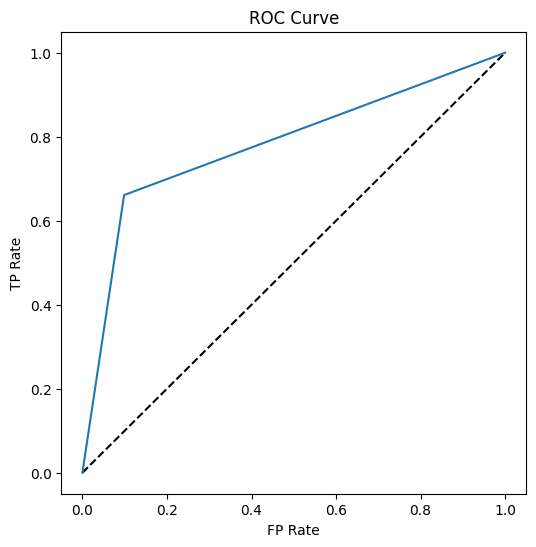

In [83]:
output.roc_curve()

In [84]:
print(f'Лучший результат k = {k}', f'accuracy = {score}', sep=f'\n')

Лучший результат k = 6
accuracy = 0.8731583177069381


Лучший результат показала модель с k = 6: accuracy = 0.8731583177069381

## Naive Bayesa

In [85]:
nb = GaussianNB()
result = fit_model_and_param(nb, X_train, X_test, y_train, y_test)

In [86]:
pprint(result)

{'best_model': GaussianNB(),
 'best_params': None,
 'metrics': {'accuracy': 0.9351281364407537,
             'cohen_kappa': 0.7035772665272626,
             'f1': 0.7404893731023399,
             'recall': 0.7885127424876379,
             'roc_auc': 0.871569335986598},
 'my_metrics': {'my_accuracy': 0.9351281364407537,
                'my_f1': 0.7404893731023399,
                'my_precision': 0.697979797979798,
                'my_recall': 0.7885127424876379},
 'y_pred': array([1, 0, 0, ..., 0, 0, 0])}


In [87]:
output = output_matrix_or_roc(y_test, result['y_pred'])

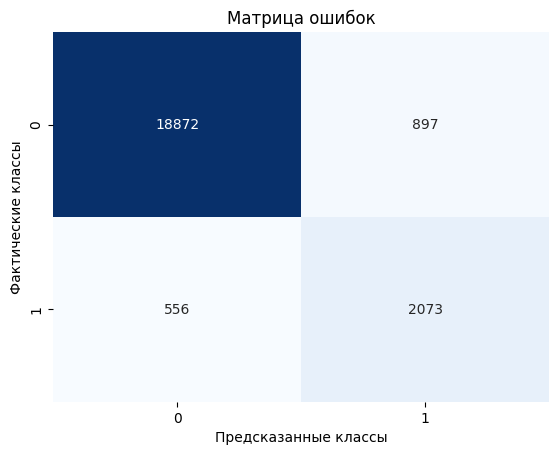

In [88]:
output.confusion_matrix()

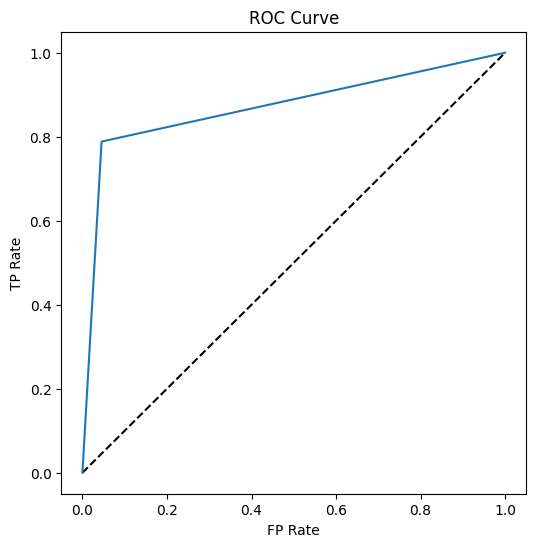

In [89]:
output.roc_curve()

## SVM

In [58]:
svc = SVC()

### Ядро "rbf"

In [91]:
param_grid_for_rbf = {'C' : [10],
             'kernel' : ['rbf']}

In [92]:
result = fit_model_and_param(svc, X_train, X_test, y_train, y_test, param_grid_for_rbf)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................................C=10, kernel=rbf; total time=  21.2s
[CV] END ...................................C=10, kernel=rbf; total time=  25.4s
[CV] END ...................................C=10, kernel=rbf; total time=  25.0s
[CV] END ...................................C=10, kernel=rbf; total time=  23.6s
[CV] END ...................................C=10, kernel=rbf; total time=  23.3s


In [93]:
pprint(result)

{'best_model': SVC(C=10),
 'best_params': {'C': 10, 'kernel': 'rbf'},
 'metrics': {'accuracy': 0.9063755692472543,
             'cohen_kappa': 0.6311602638391999,
             'f1': 0.6833761135437113,
             'recall': 0.8607835678965386,
             'roc_auc': 0.8866111172478799},
 'my_metrics': {'my_accuracy': 0.9063755692472543,
                'my_f1': 0.6833761135437113,
                'my_precision': 0.5665998998497747,
                'my_recall': 0.8607835678965386},
 'y_pred': array([0, 0, 0, ..., 0, 1, 0])}


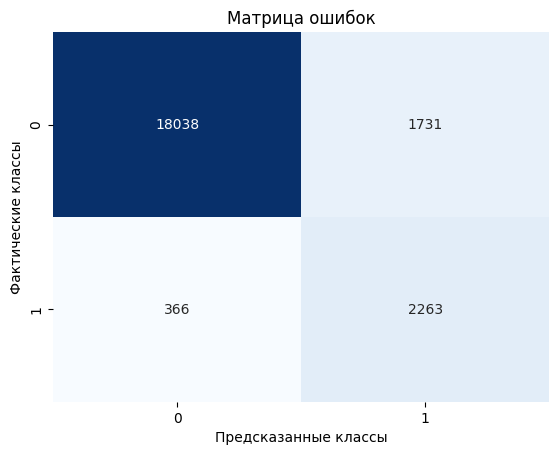

In [94]:
output = output_matrix_or_roc(y_test, result['y_pred'])
output.confusion_matrix()

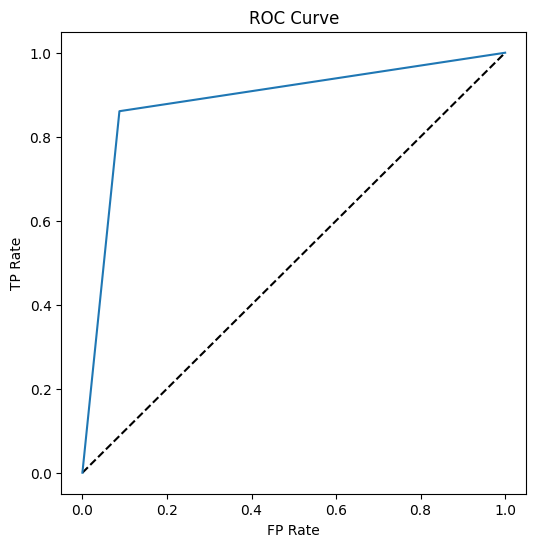

In [95]:
output.roc_curve()

### Ядро "linear"

In [59]:
param_grid_for_linear = {'C' : [10],
             'kernel' : ['linear']}

In [60]:
result = fit_model_and_param(svc, X_train, X_test, y_train, y_test, param_grid_for_linear)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................C=10, kernel=linear; total time=  28.6s
[CV] END ................................C=10, kernel=linear; total time=  52.4s
[CV] END ................................C=10, kernel=linear; total time=  53.9s
[CV] END ................................C=10, kernel=linear; total time=  56.3s
[CV] END ................................C=10, kernel=linear; total time=  41.7s


In [ ]:
with open("C:/MLforGIt/ML_RGR/Models/SVM.pickle","wb") as f:
    pickle.dump(result["best_model"],f)

In [98]:
pprint(result)

{'best_model': SVC(C=10, kernel='linear'),
 'best_params': {'C': 10, 'kernel': 'linear'},
 'metrics': {'accuracy': 0.9320028573979819,
             'cohen_kappa': 0.7031974397553645,
             'f1': 0.7418206475673843,
             'recall': 0.8322556104982883,
             'roc_auc': 0.8887617270458967},
 'my_metrics': {'my_accuracy': 0.9320028573979819,
                'my_f1': 0.7418206475673843,
                'my_precision': 0.6691131498470948,
                'my_recall': 0.8322556104982883},
 'y_pred': array([1, 0, 0, ..., 0, 1, 0])}


In [99]:
output = output_matrix_or_roc(y_test, result['y_pred'])

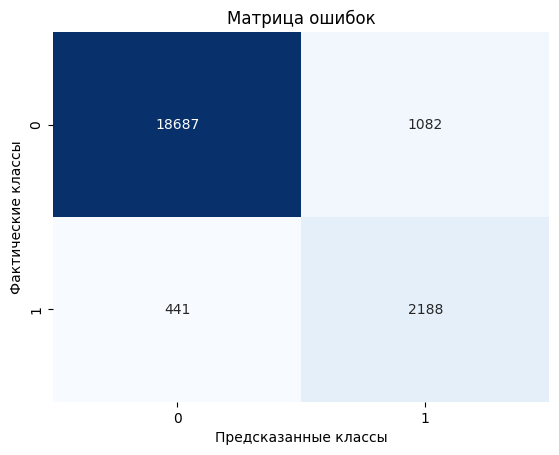

In [100]:
output.confusion_matrix()

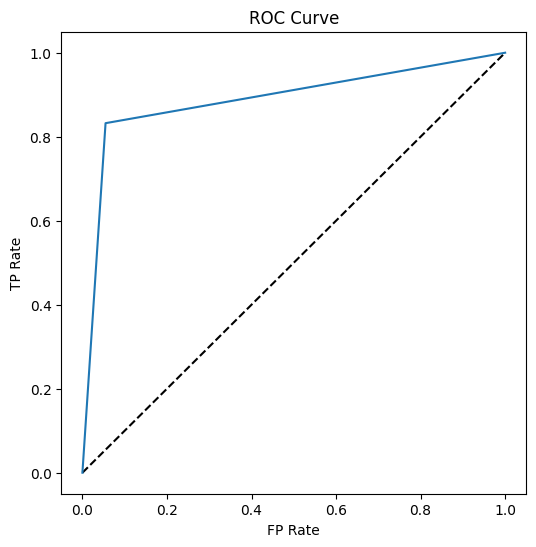

In [101]:
output.roc_curve()

### Ядро "poly"

In [102]:
param_grid_for_poly = {'C' : [10],
             'kernel' : ['poly']}

In [103]:
result = fit_model_and_param(svc, X_train, X_test, y_train, y_test, param_grid_for_poly)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..................................C=10, kernel=poly; total time=  22.8s
[CV] END ..................................C=10, kernel=poly; total time=  27.5s
[CV] END ..................................C=10, kernel=poly; total time=  29.3s
[CV] END ..................................C=10, kernel=poly; total time=  28.9s
[CV] END ..................................C=10, kernel=poly; total time=  33.2s


In [104]:
pprint(result)

{'best_model': SVC(C=10, kernel='poly'),
 'best_params': {'C': 10, 'kernel': 'poly'},
 'metrics': {'accuracy': 0.8838735601392982,
             'cohen_kappa': 0.5520386979671498,
             'f1': 0.6164282554195546,
             'recall': 0.7949790794979079,
             'roc_auc': 0.8453371799937818},
 'my_metrics': {'my_accuracy': 0.8838735601392982,
                'my_f1': 0.6164282554195546,
                'my_precision': 0.5033718689788054,
                'my_recall': 0.7949790794979079},
 'y_pred': array([0, 0, 0, ..., 0, 1, 0])}


In [105]:
output = output_matrix_or_roc(y_test, result['y_pred'])

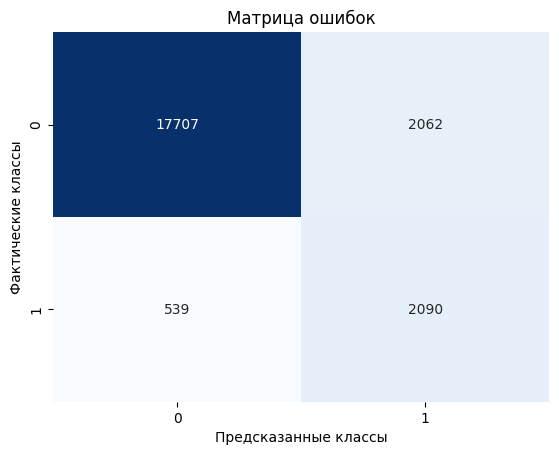

In [106]:
output.confusion_matrix()

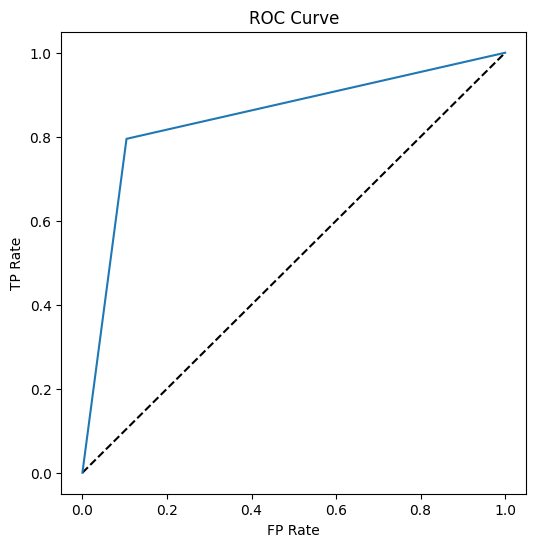

In [107]:
output.roc_curve()

# Выбор лучшей модели:

In [108]:
classifiers = {
    'SVC': SVC(C=10, kernel='rbf' ),
    'KNN classifier': KNeighborsClassifier(n_neighbors=6),
    'LogisticRegression': LogisticRegression(solver='liblinear', penalty='l1', max_iter=100, C=0.01),
    'GaussianNB': GaussianNB()
}

In [109]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for SVC: 90.6% 
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     19769
           1       0.57      0.86      0.68      2629

    accuracy                           0.91     22398
   macro avg       0.77      0.89      0.81     22398
weighted avg       0.93      0.91      0.91     22398

Accuracy (train) for KNN classifier: 87.3% 
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     19769
           1       0.47      0.66      0.55      2629

    accuracy                           0.87     22398
   macro avg       0.71      0.78      0.74     22398
weighted avg       0.90      0.87      0.88     22398

Accuracy (train) for LogisticRegression: 93.3% 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     19769
           1       0.68      0.80      0.74      2629

    accuracy                           0.93     22398
   

# Лучшая модель

Лучшие результаты показала модель Naive Bayesa:

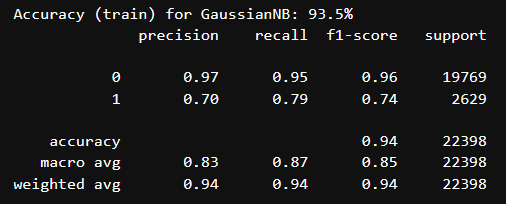